In [148]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

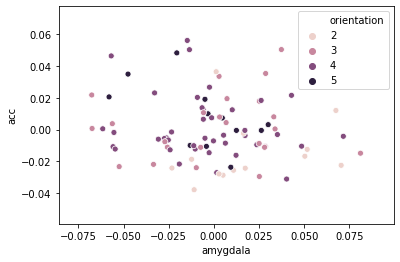

In [68]:
data = pd.read_csv("n90pol.csv")
#display(data)

sns.scatterplot(data=data, x='amygdala', y ='acc',hue="orientation")
plt.show()

The optimal choice for bandwidth h is:  0.013973984566878189
the the optimal number of bins is: 11


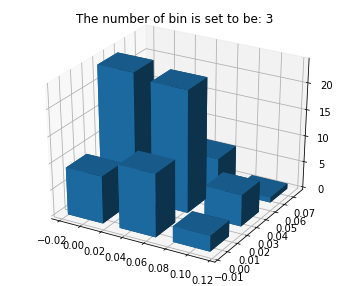

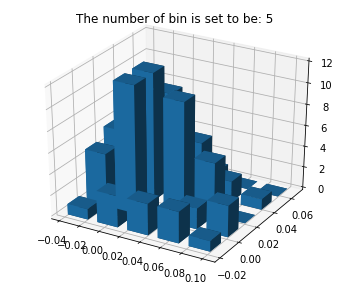

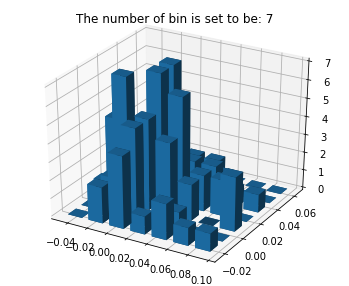

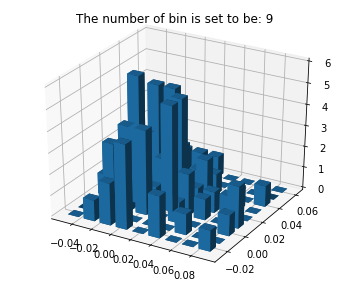

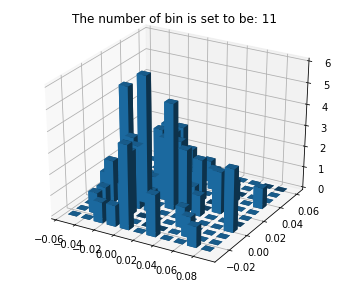

In [303]:
def Two_D_hist(data, bins=5):
    fig = plt.figure(figsize=(6,5))
    # create a 3d plot
    ax = fig.add_subplot(111, projection='3d')
    
    # get the count for each node of the x-y data with sepcified bins
    hist, xedges, yedges = np.histogram2d(data.iloc[:,0], data.iloc[:,1], bins, range=[[min(data["amygdala"]), max(data["amygdala"])], [min(data["acc"]), max(data["acc"])]])

    # make meshgrid and parameters for 3-d plot
    xpos, ypos = np.meshgrid(xedges[1:], yedges[1:])
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like (xpos)
    
    dx = np.abs(xedges [0]/bins*1.5)
    dy = np.abs(yedges [0]/bins*1.5)
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.set_title("The number of bin is set to be: "+str(bins))

    plt.show()

# Silverman’s rule of thumb
var = np.var(data["amygdala"])
h = 1.06*np.sqrt(var)*(len(data["amygdala"]))**(-0.2)
print ("The optimal choice for bandwidth h is: ", h )

# Thus the the optimal number of bins is: , can be calculated as follow:
bin_number = int(round((max(data["amygdala"])-min(data["amygdala"]))/h))
print ("the the optimal number of bins is:",bin_number )

for i in range(3,bin_number+1,2):
    Two_D_hist(data,i)